# **Kelompok 1**

<b>Nama Anggota:</b>
1. Novita Maulana Arochma
2. Alissyah Putri
3. Happy Dwi Septia
4. Lidwina Juliananda
5. Evelyn Theodora Hasiana

# **Chatbot Pencegahan dan Penanganan Kekerasan Seksual yang Melibatkan Civitas Akademika**
---



**Kekerasan seksual** sering terjadi di lingkungan kampus, namun korban (kebanyakan mahasiswa) tidak berani untuk melaporkan, karena di beberapa kasus melibatkan mahasiswa lain atau bahkan tenaga pendidik lain (Dosen) sehingga korban tidak berani untuk melaporkan kasus tersebut.Komnas Perempuan memaparkan data bahwa kekerasan seksual di lingkungan pendidikan antara tahun 2015-2021 paling banyak terjadi di perguruan tinggi atau universitas. Sebanyak 35 laporan kekerasan seksual di perguruan tinggi yang masuk ke Komnas Perempuan dalam periode tersebut. Kekerasan yang terjadi di lingkungan pendidikan yakni kekerasan seksual 87,91 persen, psikis dan diskriminasi 8,8 persen. Lalu, kekerasan fisik 1,1 persen. Perguruan tinggi menempati urutan pertama untuk kekerasan seksual di lingkungan pendidikan dengan 35 kasus pada tahun 2015 hingga 2021. Maka dari itu kelompok kami mrmbuat chatbot yang berkaitan dengan kekerasan seksual dalam rangka Pencegahan dan Penanganan Kekerasan Seksual yang Melibatkan Civitas Akademika

**Tujuan membuat Chatbot ini yaitu**


*   Memudahkan mahasiswa memperoleh informasi mengenai kekerasan seksual menggunakan sistem chatbot.
*   Mengarahkan korban kekerasan seksual.
* Agar mahasiswa lebih waspada terkait kekerasan seksual.
* Menambah pengetahuan mahasiswa terkait pentingnya pengetahuan mengenai kekerasan seksual.

# **Chatbot With Neural Network**

<b>Chatbot</b> merupakan bagian dari NLP atau Natural Language Processing yang digunakan untuk melakukan percakapan yang dapat berbentuk teks maupun ucapan. Pada project yang kami kembangkan merupakan sebuat chatbot otomatis tentang Pencegahan dan Penanganan Kekerasan Seksual. Tahapan yang kami lakukan pada model ini adalah sebagai berikut : Import library

Dalam tahapan Chatbot ini ada tahapan yang harus kita perhatikan yaitu,

1. Import Library
2. Load Dataset
3. Preprocessing Data
4. Input Length, Output Length and Vocabulary
5. Neural Network Model
6. Model Analysis
7. Testing
8. Save Model


## **Download Dataset From Google Drive**

https://drive.google.com/file/d/1Iou28mONEShnz9c-vYpmn3DTADqEJ2tq/view?usp=sharing

Setelah mengunduh dataset yang dibutuhkan dataset akan dimasukkan secara manual ke dalam google collab untuk selanjutnya diproses ke dalam model chatbot

# **Load Google Drive**

Setelah kita mengunduh dataset dengan library request url dari link yang kita ketahui maka kita akan menyimpan file data yang kita download di Google Drive dengan dengan cara klik pada menu "**Mount Drive**" maka akan keluar code dibawah ini.

**Notes:** Mohon dirunning terlebih dahulu

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Instalasi Library Pengenalan Suara**

Instalasi package sangat diperlukan ketika kita membutuhkan suatu fitur atau library yang akan kita gunakan. Pada proyek AI Chatbot membutuhkan package library yaitu **Speech Recognition** dan **Google Text To Speech** yang harus di install.

In [ ]:
!pip -q install SpeechRecognition

     |████████████████████████████████| 32.8 MB 1.4 MB/s 


carbon.svg

In [ ]:
!pip -q install gtts

     |████████████████████████████████| 62 kB 1.6 MB/s 
     |████████████████████████████████| 96 kB 6.4 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython 7.9.0 requires jedi>=0.10, which is not installed.
flask 1.1.4 requires click<8.0,>=5.1, but you have click 8.1.3 which is incompatible.


# **Import Library**

Tahapan pertama sebelum melakukan eksplorasi dan praproses pada data adalah memasukan library yang akan digunakan untuk menganalisa dataset dengan menggunakan metode Deep Learning seperti Neural Network dalam pengolahan teks, Chatbot dll. Library yang saya gunakan yaitu NumPy untuk komputasi matematika, Matplotlib untuk visualisasi model data, Natural Language Toolkit atau NLTK untuk pengolahan teks, Pandas untuk membaca data, serta Tensorflow untuk model pada data menggunakan algoritma LSTM dan Jaringan Syaraf Tiruan (Neural Network).

In [ ]:
# Import Libraries
import json
import nltk
import time
import random
import string
import pickle
import numpy as np
import pandas as pd
from gtts import gTTS
from io import BytesIO
import tensorflow as tf
import IPython.display as ipd
import speech_recognition as sr 
import matplotlib.pyplot as plt
from nltk.stem import WordNetLemmatizer
from tensorflow.keras.models import Model
from keras.utils.vis_utils import plot_model
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Input, Embedding, LSTM
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Flatten, Dense, GlobalMaxPool1D

## **Download NLTK Package**

In [ ]:
# Package sentence tokenizer
nltk.download('punkt')
# Package lemmatization
nltk.download('wordnet')
# Package multilingual wordnet data
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

# **Load Dataset Json**

Setelah import library, tahapan selanjutnya adalah me-load dataset yang telah disediakan. Dataset yang digunakan berupa format **.json** yang sangat cocok untuk membuat model Chatbot. 

Data Json merupakan data yang termasuk dalam *semi structured* yang dimana data ini menampung beberapa bagian data seperti **tag**, **pattern**, **context**, dan **response**. Data yang dipakai dalam proyek ini menggunakan dataset manual yang diciptakan oleh student Kampus Merdeka Batch 3 tentang <b>Chatbot Sistem Pencegahan dan Penanganan Kekerasan Seksual.</b>

In [ ]:
# membaca dan menampilkan data json
intents = json.loads(open('/content/kekerasanseksual.Json').read())
intents

{'intents': [{'tag': 'salam',
   'patterns': ['hai',
    'HAY',
    'hay',
    'hy',
    'hallo',
    'hi',
    'halo',
    'hai min',
    'p',
    'good morning',
    'good afternoon',
    'good night',
    'pagi',
    'siang',
    'sore',
    'malem',
    'helo'],
   'responses': ['Hi!. Selamat datang di Web Pencegahan dan Penanganan Kekerasan Seksual, ada yang bisa kami bantu?']},
  {'tag': 'goodbye',
   'patterns': ['bye',
    'goodbye',
    'selmat tinggal',
    'terimakasih infonya',
    'thanks',
    'see u',
    'see you',
    'see you again',
    'dadah',
    'makasih min',
    'terimakasih',
    'makasih',
    'maaciw'],
   'responses': ['Terimaksih sudah mengakses Web Pencegahan dan Penanganan Kekerasan Seksual. Semoga dengan Web ini masalah yang sedan anda alami bisa teratasi dan tetap semangat!']},
  {'tag': 'UU_TPKS',
   'patterns': ['apa itu uu tpks?',
    'uu tpks',
    'apa isi uu tpks?',
    'isi uu tpks?',
    'Undang-undang Tindak Pidana Kekerasan Seksual',
    'isi

In [ ]:
# Importing the dataset
with open('///content/kekerasanseksual.Json') as content:
  data1 = json.load(content)

# Mendapatkan semua data ke dalam list
tags = [] # data tag
inputs = [] # data input atau pattern
responses = {} # data respon
words = [] # Data kata
classes = [] # Data Kelas atau Tag
documents = [] # Data Kalimat Dokumen
ignore_words = ['?', '!'] # Mengabaikan tanda spesial karakter

for intent in data1['intents']:
  responses[intent['tag']]=intent['responses']
  for lines in intent['patterns']:
    inputs.append(lines)
    tags.append(intent['tag'])
    for pattern in intent['patterns']:
      w = nltk.word_tokenize(pattern)
      words.extend(w)
      documents.append((w, intent['tag']))
      # add to our classes list
      if intent['tag'] not in classes:
        classes.append(intent['tag'])

# Konversi data json ke dalam dataframe
data = pd.DataFrame({"patterns":inputs, "tags":tags})

In [ ]:
# Cetak data keseluruhan
data

,inputs,tags
0,hai,salam
1,hay,salam
2,hay,salam
3,hy,salam
4,hallo,salam
...,...,...
160,bantuan untuk pemulihan,Pelayanan_Terpadu_korban_kekerasan_seksual
161,pemulihan trauma,Pelayanan_Terpadu_korban_kekerasan_seksual
162,trauma,Pelayanan_Terpadu_korban_kekerasan_seksual
163,layanan bagi korban yang trauma,Pelayanan_Terpadu_korban_kekerasan_seksual


# **Preprocessing The Data**

Setelah kita meload data dan mengonversi data json menjadi dataframe. Tahapan selanjutnya adalah praproses pada dataset yang kita gunakan saat ini yaitu dengan cara:

1. Remove Punctuations (Menghapus Punktuasi)
2. Lematization (Lematisasi)
3. Tokenization (Tokenisasi)
4. Apply Padding (Padding)
5. Encoding the Outputs (Konversi Keluaran Enkoding)

## **Remove Punctuations**

Tahapan praproses pada data teks yang pertama adalah menghapus punktuasi atau tanda baca seperti *special character* yaitu **'!'** (**tanda seru**) **','** (**tanda koma**) **'.'** (**tanda titik sebagai berhenti**) '**?**' (**tanda tanya**) dan tanda baca yang lain. Tahapan ini gunanya untuk mempermudah pemrosesan data teks yang akan kita olah.

In [ ]:
# mengkonversi data json ke dalam dataframe 
data = pd.DataFrame({"inputs":inputs,"tags":tags})
data # menampilkan data keseluruhan

,inputs,tags
0,hai,salam
1,HAY,salam
2,hay,salam
3,hy,salam
4,hallo,salam
...,...,...
160,bantuan untuk pemulihan,Pelayanan_Terpadu_korban_kekerasan_seksual
161,pemulihan trauma,Pelayanan_Terpadu_korban_kekerasan_seksual
162,trauma,Pelayanan_Terpadu_korban_kekerasan_seksual
163,layanan bagi korban yang trauma,Pelayanan_Terpadu_korban_kekerasan_seksual


In [ ]:
# Menghilangkan tanda baca (punktuasi)
data["inputs"] = data["inputs"].apply(lambda wrd:[ltrs.lower() for ltrs in wrd if ltrs not in string.punctuation])
data["inputs"] = data["inputs"].apply(lambda wrd: ''.join(wrd))

## **Lemmatization (Lematisasi)**


Lematisasi atau Lemmatization adalah proses dimana merujuk pada melakukan sesuatu menggunakan vocabulary atau kosakata dan analisis morfologi kata-kata untuk menghilangkan *inflectional endings only* dan untuk mengembalikan bentuk *dictionary* (kata dalam kamus) dari sebuah kata yang dikenal sebagai ***lemma***.

In [ ]:
# Lematisasi atau Lemmatization
lemmatizer = WordNetLemmatizer()
words = [lemmatizer.lemmatize(w.lower()) for w in words if w not in ignore_words]
words = sorted(list(set(words)))

print (len(words), "unique lemmatized words", words)


180 unique lemmatized words ['adalah', 'afternoon', 'again', 'aja', 'alami', 'alasan', 'alat', 'apa', 'apakah', 'aparat', 'apasih', 'apkah', 'arti', 'asas', 'atasan', 'atur', 'badan', 'bagaimana', 'bagi', 'bagimana', 'bantuan', 'baru', 'bela', 'bentuk', 'berani', 'berbasis', 'berbau', 'berbicara', 'berdaya', 'berhak', 'berhubungan', 'berwajib', 'bila', 'bos', 'buat', 'budak', 'bye', 'calling', 'candaan', 'cara', 'cat', 'contoh', 'dadah', 'dalam', 'dari', 'dasar', 'dengan', 'di', 'diam-diam', 'dijadikan', 'dimaksud', 'dimanfaatkan', 'dipakai', 'dipaksa', 'diri', 'disebarkan', 'eksploitasi', 'elektronik', 'fisik', 'gestur', 'good', 'goodbye', 'hai', 'hak', 'hal', 'hal-hal', 'hallo', 'halo', 'hay', 'helo', 'hi', 'hubungan', 'hukuma', 'hukuman', 'hy', 'infonya', 'ingin', 'ini', 'isi', 'isinya', 'itu', 'jadikan', 'jika', 'ke', 'kekerasan', 'kerja', 'kita', 'konsekuensi', 'kontrasepsi', 'korban', 'kuasa', 'lakukan', 'layanan', 'lebih', 'maaciw', 'makasih', 'maksus', 'malem', 'mekanisme/cara'

### **Menyortir Data Kelas Tags**

In [ ]:
# sort classes
classes = sorted(list(set(classes)))
print (len(classes), "classes", classes)

23 classes ['Asas_Tindak_Pidana_Kekerasan_Seksual', 'Bentuk-bentuk_Kekerasan_Seksual', 'Hak_korbah', 'Hal_baru_dalam UU_TPKS', 'Hukuman_bagi_pelaku', 'Kontrasepsi', 'Pelayanan_Terpadu_korban_kekerasan_seksual', 'Pelecehan_seksual_Nonfisik', 'Pemaksaan_sterilisasi', 'Pengertian_Kekerasan_Seksual', 'Tujuan_UU_TPKS', 'UU_TPKS', 'bila_pelaku_adalah_atasan_korban', 'cara_pelaporan', 'eksploitasi_seksual', 'goodbye', 'kekerasan_seksual_berbasis_elektronik', 'pelecehan_seksual_fisik', 'pemaksaan_perkawinan', 'penyiksaan_seksual', 'perbudakan_seksual', 'salam', 'tidak_berani_melapor']


### **Mencari Jumlah Keseluruhan Data Teks**

In [ ]:
# documents = combination between patterns and intents
print (len(documents), "documents")

1393 documents


## **Tokenization (Tokenisasi)**


Tokenisasi adalah suatu proses memberikan urutan karakter dan sebuah unit dokumen terdefinisi. Tokenisasi juga merupakan tugas untuk memecah kalimat menjadi bagian-bagian yang disebut dengan '**Token**' dan menghilangkan bagian tertentu seperti tanda baca.'

In [ ]:
# Tokenize the data (Tokenisasi Data)
tokenizer = Tokenizer(num_words=2000)
tokenizer.fit_on_texts(data['patterns'])
train = tokenizer.texts_to_sequences(data['patterns'])
train

[[64],
 [65],
 [65],
 [95],
 [96],
 [97],
 [98],
 [64, 66],
 [99],
 [43, 100],
 [43, 101],
 [43, 102],
 [103],
 [104],
 [105],
 [106],
 [107],
 [108],
 [109],
 [110, 111],
 [67, 112],
 [113],
 [44, 114],
 [44, 68],
 [44, 68, 115],
 [116],
 [69, 66],
 [67],
 [69],
 [117],
 [2, 20, 5, 6],
 [5, 6],
 [2, 34, 5, 6],
 [34, 5, 6],
 [18, 18, 28, 29, 3, 1],
 [34, 18, 18, 28, 29, 3, 1],
 [45, 5, 6],
 [118, 5, 6],
 [2, 20, 3, 1],
 [2, 4, 13, 14, 3, 1],
 [45, 3, 1, 20],
 [3, 1],
 [3, 1, 2],
 [4, 7, 119, 3, 1],
 [70],
 [70, 3, 1],
 [2, 16, 120, 4, 121],
 [8, 71, 28, 29, 3, 1],
 [122, 23, 5, 6],
 [71, 28, 29, 3, 1],
 [2, 24, 23, 5, 6],
 [45, 24, 23, 18, 18, 6],
 [2, 123, 24, 23, 5, 6],
 [24, 5, 6],
 [24, 18, 18, 28, 29, 3, 1],
 [24],
 [124, 5, 6, 7, 72],
 [125, 5, 6, 7, 72],
 [2, 16, 4, 35, 46, 36, 3, 1],
 [47, 3, 1],
 [73, 3, 1],
 [47, 3, 1],
 [4, 35, 3, 1],
 [2, 16, 47, 3, 1],
 [73, 30, 1],
 [2, 15, 12, 10],
 [15],
 [15, 12, 74],
 [126, 23, 10, 3, 1],
 [127, 2],
 [15, 12, 74, 4, 128],
 [15, 12, 12

## **Padding**

**Padding** adalah Suatu proses untuk mengubah setiap sequence agar memiliki panjang yang sama. Pada padding, setiap sequence dibuat sama panjang dengan menambahkan nilai 0 secara suffiks atau prefiks hingga mencapai panjang maksimum sequence. Selain itu padding juga dapat memotong sequence hingga panjangnya sesuai dengan panjang maksimum sequence. 


In [ ]:
# menambahkan padding ke dalam data train
x_train = pad_sequences(train)
x_train

array([[ 0,  0,  0, ...,  0,  0, 64],
       [ 0,  0,  0, ...,  0,  0, 65],
       [ 0,  0,  0, ...,  0,  0, 65],
       ...,
       [ 0,  0,  0, ...,  0,  0, 63],
       [ 0,  0,  0, ..., 11,  4, 63],
       [ 0,  0,  0, ..., 42, 22, 11]], dtype=int32)

Hasil setelah padding adalah setiap sequence memiliki panjang yang sama. Padding dapat melakukan ini dengan menambahkan 0 secara default pada awal sequence yang lebih pendek.

## **Encoding Text**


Encoding merupakan suatu konversi atau pengkodean yang dimana data kategorik seperti huruf atau data teks menjadi data numerik atau angka menyesuaikan dengan data label yang digunakan. Pada proses tahapan ini, encoding mengubah data teks pada kolom data tags menjadi data numerik dengan bahasa biner komputer yaitu 0 dan 1. 

Tujuan dari encoding ini adalah mempermudah saat proses komputasi data teks dan modelling.

In [ ]:
# proses encoding
le = LabelEncoder()
y_train = le.fit_transform(data["tags"])
y_train

array([21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21,
       15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 11, 11, 11, 11,
       11, 11, 11, 11,  9,  9,  9,  9,  9,  9,  9,  9,  0,  0,  0,  0, 10,
       10, 10, 10, 10, 10, 10, 10,  1,  1,  1,  1,  1,  1,  1,  4,  4,  4,
        4,  4,  4,  4,  3,  3,  3,  3,  3,  3,  7,  7,  7,  7,  7,  7,  7,
        7,  7,  7,  7, 17, 17, 17, 17, 17, 17,  5,  5,  5,  5,  5,  8,  8,
        8, 18, 18, 18, 18, 18, 18, 18, 19, 19, 19, 19, 19, 14, 14, 14, 14,
       14, 20, 20, 20, 20, 20, 16, 16, 16, 16, 16, 16, 16, 16, 12, 12, 12,
       12, 12, 22, 22, 22, 22, 22, 22, 13, 13, 13, 13, 13, 13, 13, 13,  2,
        2,  2,  2,  2,  6,  6,  6,  6,  6,  6,  6,  6])

Tokenizer pada Tensorflow memberikan token unik untuk setiap kata yang berbeda. Dan juga padding dilakukan untuk mendapatkan semua data dengan panjang yang sama sehingga dapat mengirimkannya ke lapisan atau layer RNN. variabel target juga dikodekan menjadi nilai desimal.

# **Input Length, Output Length and Vocabulary**

In [ ]:
# input length
input_shape = x_train.shape[1]
print(input_shape)

11


In [ ]:
# panjang inputan
input_shape = x_train.shape[1]
print(input_shape)

11


In [ ]:
#Menampilkan kata unik dan panjang output
unique_words = len(tokenizer.word_index) # pendefinisian unique_words
output_length = le.classes_.shape[0] # panjang output
print("unique words: ", unique_words) # menamilkan jumlah unique_words
print("output length: ", output_length) # menampilkan panjang outup

unique words:  179
output length:  23


**Input length** dan **output length** terlihat sangat jelas hasilnya. Mereka adalah untuk bentuk input dan bentuk output dari data train atau latih yang akan diproses pada algoritma Neural Network atau Jaringan Syaraf Tiruan.

**Vocabulary Size** adalah untuk lapisan penyematan untuk membuat representasi vektor unik untuk setiap kata.

## **Save Label Encoder & Tokenizer**

In [ ]:
pickle.dump(le, open('le.pkl','wb'))
pickle.dump(tokenizer, open('tokenizers.pkl','wb'))

# **Neural Network Model**


**LSTM (Long Short Term Memory)** merupakan algoritma Deep Learning yang populer dan cocok digunakan untuk membuat prediksi dan klasifikasi yang berhubungan dengan waktu dan data teks. 

Algoritma ini bisa dikatakan pengembangan atau salah satu jenis dari algoritma RNN (Recurrent Neural Network). Dalam algoritma RNN, output dari langkah terakhir diumpankan kembali sebagai input pada langkah yang sedang aktif. Namun, algoritma RNN memiliki kekurangan yaitu tidak dapat memprediksi kata yang disimpan dalam memori jangka panjang.

Di bawah ini kami telah menambahkan layer pada model neural network

In [ ]:
# membuat model Neural Network
model = tf.keras.Sequential()
model.add(Input(shape=(input_shape,)))
model.add(Embedding(unique_words+1, 10, input_length= (input_shape,)))
model.add(LSTM(10, return_sequences=True))
model.add(Flatten())
model.add(Dense(units= 10, activation='relu'))
model.add(Dense(units= 5, activation='relu'))
model.add(Dense(units= output_length, activation='softmax'))

model.compile(loss = "sparse_categorical_crossentropy", optimizer ='adam', metrics=['accuracy'])

In [ ]:
# Menampilkan Parameter Model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 11, 10)            1800      
                                                                 
 lstm (LSTM)                 (None, 11, 10)            840       
                                                                 
 flatten (Flatten)           (None, 110)               0         
                                                                 
 dense (Dense)               (None, 10)                1110      
                                                                 
 dense_1 (Dense)             (None, 5)                 55        
                                                                 
 dense_2 (Dense)             (None, 23)                138       
                                                                 
Total params: 3,943
Trainable params: 3,943
Non-trainabl

In [ ]:
train = model.fit(x_train, y_train, epochs=300)

Epoch 1/300
6/6 [==============================] - 6s 7ms/step - loss: 3.1355 - accuracy: 0.0242 
Epoch 2/300
6/6 [==============================] - 0s 5ms/step - loss: 3.1339 - accuracy: 0.0848
Epoch 3/300
6/6 [==============================] - 0s 5ms/step - loss: 3.1321 - accuracy: 0.0485
Epoch 4/300
6/6 [==============================] - 0s 5ms/step - loss: 3.1303 - accuracy: 0.0485
Epoch 5/300
6/6 [==============================] - 0s 5ms/step - loss: 3.1288 - accuracy: 0.0848
Epoch 6/300
6/6 [==============================] - 0s 5ms/step - loss: 3.1270 - accuracy: 0.0909
Epoch 7/300
6/6 [==============================] - 0s 5ms/step - loss: 3.1243 - accuracy: 0.0667
Epoch 8/300
6/6 [==============================] - 0s 5ms/step - loss: 3.1216 - accuracy: 0.0667
Epoch 9/300
6/6 [==============================] - 0s 5ms/step - loss: 3.1176 - accuracy: 0.0727
Epoch 10/300
6/6 [==============================] - 0s 5ms/step - loss: 3.1132 - accuracy: 0.0727
Epoch 11/300
6/6 [==========

# **Testing Chatbot Dan Tambahkan Suara Pada Chatbot**

Setelah mengetahui hasil dari akurasi dan loss pada model yang telah ditetapkan dengan algoritma Neural Network dan LSTM. Maka, tahapan selanjutnya adalah menguji atau testing pada chatbot yang telah dilatih sebelumnya dan melihat apakah sesuai atau tidak pada saat kita masukan teks kalimat pertanyaannya. 

Pada pengujian ini menggunakan metode input atau masukan sesuai dengan kalimat pertanyaan yang dimasukkan.

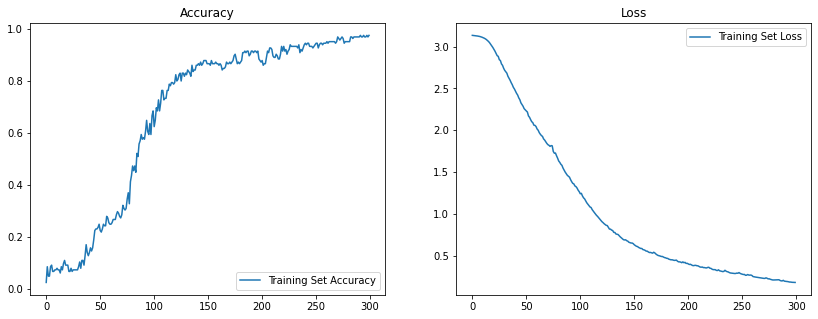

In [ ]:
# Plot Akurasi
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(train.history['accuracy'],label='Training Set Accuracy')
plt.legend(loc='lower right')
plt.title('Accuracy')
# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(train.history['loss'],label='Training Set Loss')
plt.legend(loc='upper right')
plt.title('Loss')
plt.show()

In [ ]:
# Membuat Input Chat
while True:
  texts_p = []
  prediction_input = input('👨‍🦰 Saya : ')
  
 # Menghapus punktuasi dan konversi ke huruf kecil
  prediction_input = [letters.lower() for letters in prediction_input]
  prediction_input = ''.join(prediction_input)
  texts_p.append(prediction_input)

  # Tokenisasi dan Padding
  prediction_input = tokenizer.texts_to_sequences(texts_p)
  prediction_input = np.array(prediction_input).reshape(-1)
  prediction_input = pad_sequences([prediction_input],input_shape)


  # Mendapatkan hasil keluaran pada model 
  output = model.predict(prediction_input)
  output = output.argmax()

  # Menemukan respon sesuai data tag dan memainkan voice bot
  response_tag = le.inverse_transform([output])[0]
  print("🧑‍💻 KERASbot : ", random.choice(responses[response_tag]))
  tts = gTTS(random.choice(responses[response_tag]), lang='id')
  # Simpan model voice bot ke dalam Google Drive
  tts.save('KERASbot.wav')
  time.sleep(0.08)
  # Load model voice bot from Google Drive
  ipd.display(ipd.Audio('KERASbot.wav', autoplay=False))
  print("="*60 + "\n")
  # Tambahkan respon 'goodbye' agar bot bisa berhenti
  if response_tag == "goodbye":
    break

👨‍🦰 Saya : hai
1/1 [==============================] - 0s 15ms/step
🧑‍💻 KERASbot :  Hi!. Selamat datang di Web Pencegahan dan Penanganan Kekerasan Seksual, ada yang bisa kami bantu?



👨‍🦰 Saya : undang-undang
1/1 [==============================] - 0s 18ms/step
🧑‍💻 KERASbot :  Menurut UU TPKS pasal 4, pelecehan seksual nonfisik, pelecehan seksual fisik; pemaksaan kontrasepsi; d. pemaksaan sterilisasi; e. pemaksaan perkawinan; f. penyiksaan seksual; g. eksploitasi seksual; h. perbudakan seksual; dan i. kekerasan seksual berbasis elektronik. . perkosaan; b. perbuatan cabul; c. persetubuhan terhadap Anak, perbuatan cabul terhadap Anak, dan/ atau eksploitasi seksual terhadap Anak; d. perbuatan melanggar kesusilaarr yang bertentangan dengan kehendak Korban; e. pornografi yang melibatkan Anak atau pornografi yang secara eksplisit memuat kekerasan dan eksploitasi seksual; f. pemaksaan pelacuran; g. tindak pidana perdagangan orang yang ditujukan untuk eksploitasi seksual; h. kekerasan seksual dalam lingkup rumah tangga; i. tindak pidana pencucian uang yang tindak pidana asalnya merupakan Tindak Pidana Kekerasan Seksual; dan j. tindak pidana lain yang dinyatakan secara tegas


👨‍🦰 Saya : kekerasan seksual
1/1 [==============================] - 0s 16ms/step
🧑‍💻 KERASbot :  Menurut UU TPKS Pasal 1, Kekerasan Seksual adalah setiap perbuatan merendahkan, menghina, menyerang, dan/atau perbuatan lainnya terhadap tubuh, hasrat seksual seseorang, dan/atau fungsi reproduksi, secara paksa, bertentangan dengan kehendak seseorang, yang menyebabkan seseorang itu tidak mampu memberikan persetujuan dalam keadaan bebas, karena ketimpangan relasi kuasa dan/atau relasi gender, yang berakibat atau dapat berakibat penderitaan atau kesengsaraan secara fisik, psikis, seksual, kerugian secara ekonomi, sosial, budaya, dan/atau politik



👨‍🦰 Saya : dadah
1/1 [==============================] - 0s 18ms/step
🧑‍💻 KERASbot :  Terimaksih sudah mengakses Web Pencegahan dan Penanganan Kekerasan Seksual. Semoga dengan Web ini masalah yang sedan anda alami bisa teratasi dan tetap semangat!


# **Save The Model**

Setelah pengujian Chatbot telah disesuaikan dengan kalimat dan jawabannya. Maka, model chatbot bisa disimpan dengan format .h5 atau .pkl (pickle) untuk penggunaan aplikasi AI Chatbot dengan website atau sistem Android. Penyimpanan file model bisa langsung secara transient atau bisa taruh di Google Drive.

In [ ]:
# Simpan model dalam bentuk format file .h5 atau .pkl (pickle)
model.save('chat_model.h5')

print('Model Created Successfully!')

Model Created Successfully!
